In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

data = pd.read_csv('flight.csv')
df = data.copy()

# Exploratory Data Analysis (EDA)

### Check Null Value, Missing Value, and Data Types

In [2]:
# df.head(5)
df[df['WORK_CITY']=='.']

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER WORK_CITY  \
0          54993  11/2/2006        12/24/2008    Male         6         .   
2          55106   2/1/2007         8/30/2007    Male         6         .   
20         21501  7/30/2008        11/21/2008    Male         6         .   
27         47114  1/15/2005         3/17/2005    Male         6         .   
40         18793  4/25/2006          6/2/2006    Male         6         .   
...          ...        ...               ...     ...       ...       ...   
61806       4388  4/20/2011        12/10/2011    Male         4         .   
62035      10787  8/29/2012        10/16/2013    Male         6         .   
62099      41502   1/1/2012          1/1/2012  Female         4         .   
62546      15528   6/3/2012          6/3/2012    Male         4         .   
62704      23204   9/9/2011         9/10/2011  Female         4         .   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  \
0           beijing           CN  31.0  3/31/2014           210  505308   
2           beijing           CN  40.0  3/31/2014           135  351159   
20          beijing           CN  49.0  3/31/2014           106  220641   
27          beijing           CN  47.0  3/31/2014            74  209810   
40          beijing           CN  48.0  3/31/2014            98  191809   
...             ...          ...   ...        ...           ...     ...   
61806       beijing           CN  40.0  3/31/2014             2     634   
62035       beijing           CN  55.0  3/31/2014             2     776   
62099      shanghai           CN  44.0  3/31/2014             2     692   
62546       beijing           CN  44.0  3/31/2014             2     576   
62704       beijing           CN  58.0  3/31/2014             2     244   

       SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  \
0      239560.0  234188.0      580717        3/31/2014            1   
2      163618.0  164982.0      283712        3/21/2014           11   
20      69566.0  122763.0      167113        3/28/2014            4   
27     101398.0   83139.0      148685        3/21/2014           11   
40      88788.0   85119.0      137876        3/30/2014            2   
...         ...       ...         ...              ...          ...   
61806     756.0       0.0        1586         2/1/2013          425   
62035       0.0    1044.0        1199       10/18/2013          166   
62099       NaN       0.0        2085         6/5/2012          666   
62546     970.0       0.0        1629        3/14/2013          384   
62704     175.0     469.0        1298       12/24/2013           99   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
0          3.483254            18              34      0.961639      619760   
2          5.298507            18              20      1.254676      406361   
20         6.438095            31               4      1.369404      251134   
27         9.493151            51               8      1.433364      235176   
40         7.505155            46              11      1.458541      210435   
...             ...           ...             ...           ...         ...   
61806      1.000000             1               0      0.571627         634   
62035      2.000000             2               0      0.707698        1133   
62099      2.000000             2               0      0.400000         692   
62546    284.000000           284               0      0.417772         576   
62704    409.000000           409               0      0.460000         244   

       Point_NotFlight  
0                   50  
2                   26  
20                   9  
27                  14  
40                  17  
...                ...  
61806                0  
62035                3  
62099                0  
62546                0  
62704                0  

[667 rows x 23 columns]

**There are 667 rows from WORK_CITY and WORK_PROVINCE feature with a single character only (.) instead of the name of the city**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

**The following feature has a missing value on it:**
1. GENDER
2. WORK_CITY
3. WORK_PROVINCE
4. WORK_COUNTRY
5. AGE
6. SUM_YR_1
7. SUM_YR_2

**Also, the date time features like FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE is not on the proper types as well**

### Check Duplicate Values

In [5]:
df.duplicated().sum()

0

**No duplicate values found on the dataset**

### Descriptive Analysis

In [6]:
numericals = ['AGE', 'FFP_TIER', 'EXCHANGE_COUNT','FLIGHT_COUNT', 'BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL', 'MAX_INTERVAL','avg_discount','Points_Sum','Point_NotFlight']
categoricals = ['FFP_DATE','GENDER','FIRST_FLIGHT_DATE','WORK_CITY', 'WORK_PROVINCE','WORK_COUNTRY','LAST_FLIGHT_DATE']

#LOAD_TIME only contain one value

In [7]:
df.describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62988.000000  62988.000000  62568.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.476346     11.839414   10925.081254   
std    18183.213715      0.373856      9.885915     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62437.000000   62850.000000   62988.000000  62988.000000   
mean     5355.376064    5604.026014   17123.878691    176.120102   
std      8109.450147    8703.364247   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1003.000000     780.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6574.000000    6845.750000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       Point_NotFlight  
count     62988.000000  
mean          2.728155  
std           7.364164  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

**Almost all the features are having a quite major of the gap between min and max OR Q3 and max (outliers indications), except for the following features:**
1. FFP_TIER
2. EXCHANGE_COUNT
3. avg_discount

### Univariate Analysis

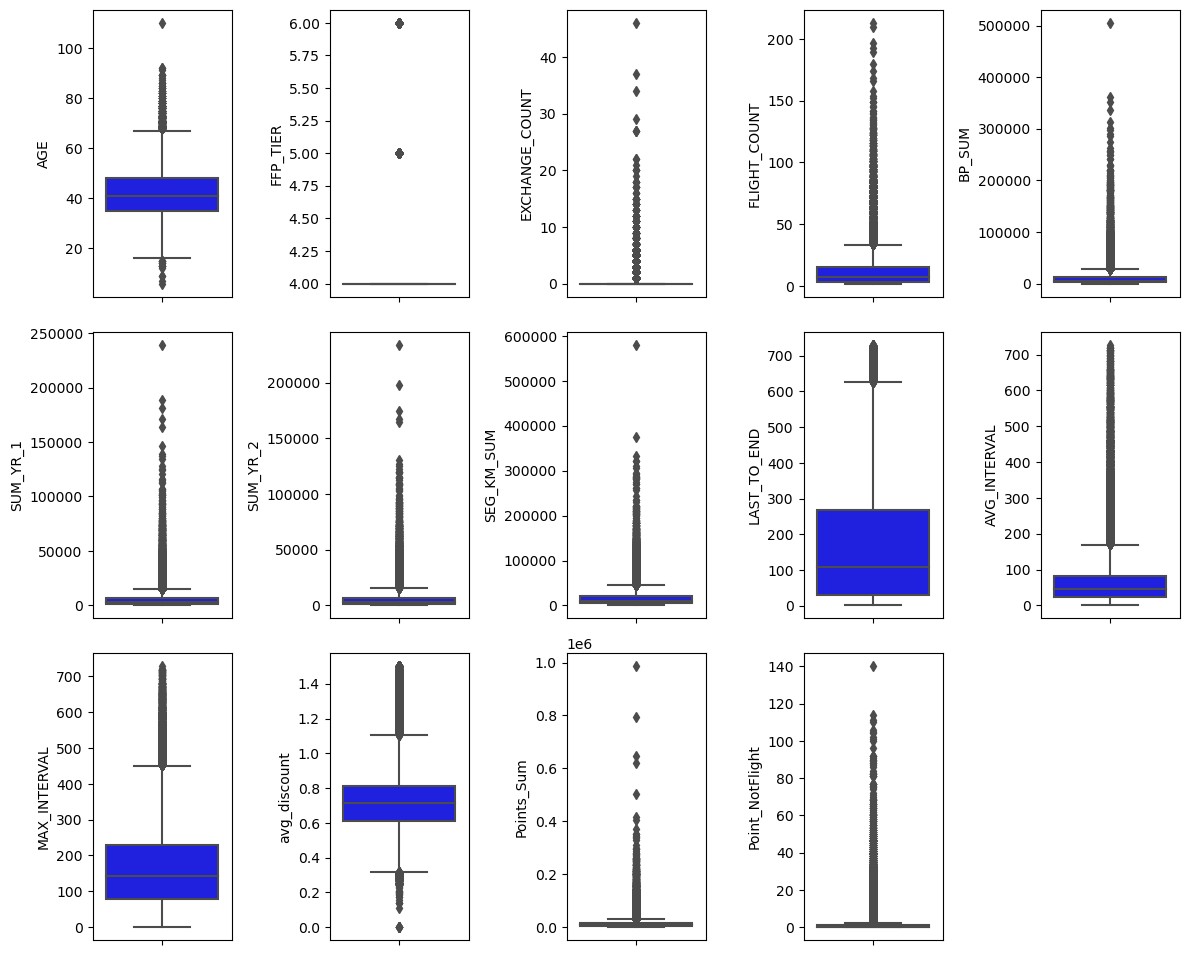

In [8]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.boxplot(y=df[numericals[i]], color='blue', orient='v')
    plt.tight_layout()

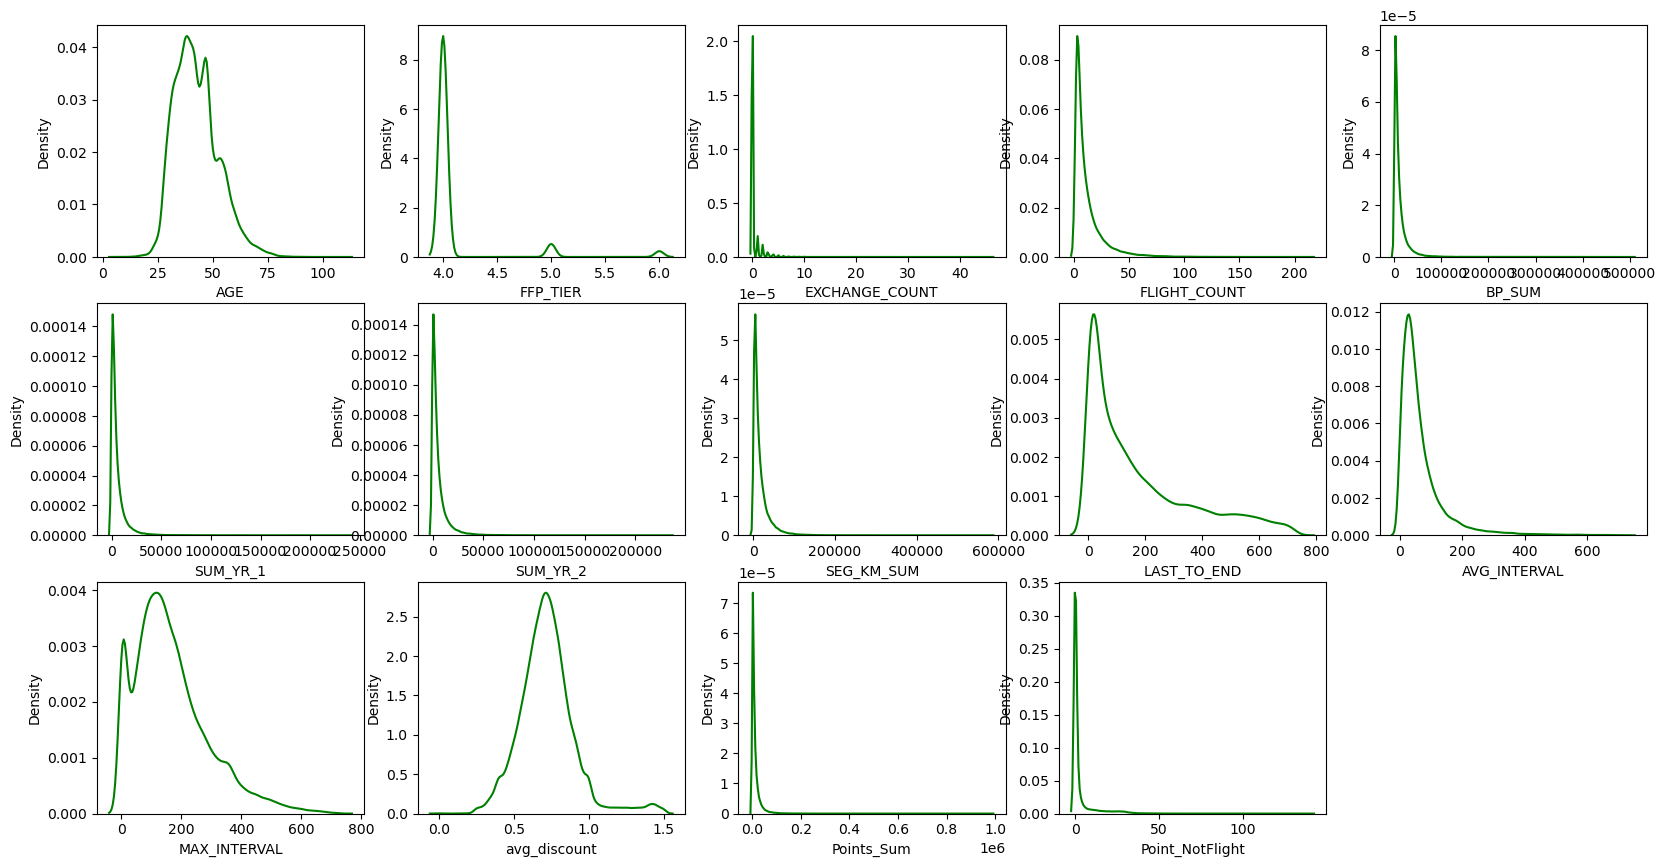

In [9]:
plt.figure(figsize=(20,50))
for i in range(len(numericals)):
    plt.subplot(len(numericals), 5, i+1)
    sns.kdeplot(x=df[numericals[i]], color='green')

**The only feature with normal distribution is AGE**

### Multivariate Analysis

<AxesSubplot:>

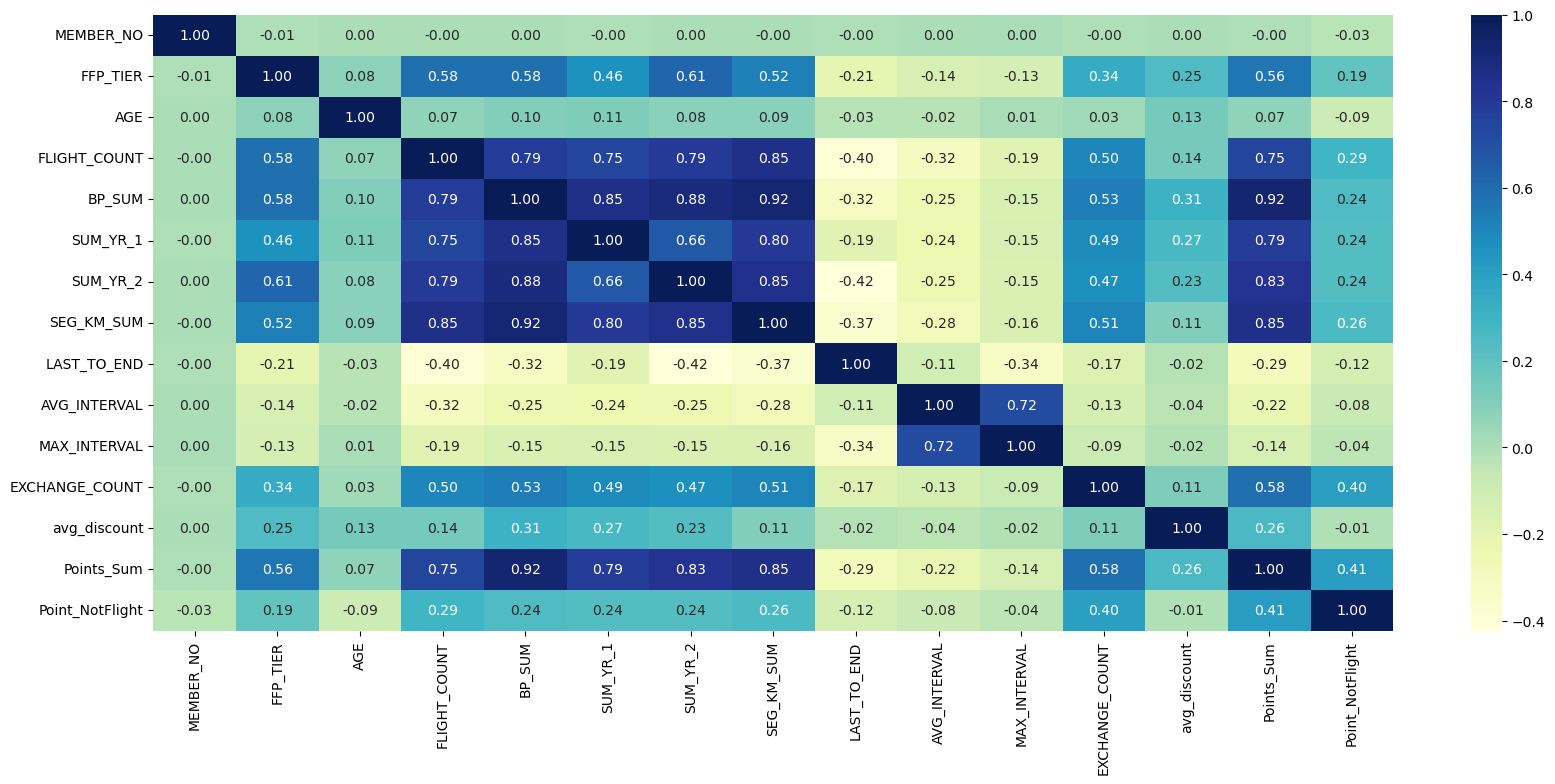

In [10]:
corr = df.corr(method='pearson')

plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')

In [11]:
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7: # jika korelasi lebih besar dari 0.7
            print(f"{corr.columns[i]} and {corr.columns[j]} have a correlation of \033[1m{corr.iloc[i, j]:.2f}\033[0m")
            high_corr.append((corr.columns[i], corr.columns[j]))

print(f"Features with High Correlation: {high_corr}")

BP_SUM and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_1 and FLIGHT_COUNT have a correlation of 0.75
SUM_YR_1 and BP_SUM have a correlation of 0.85
SUM_YR_2 and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_2 and BP_SUM have a correlation of 0.88
SEG_KM_SUM and FLIGHT_COUNT have a correlation of 0.85
SEG_KM_SUM and BP_SUM have a correlation of 0.92
SEG_KM_SUM and SUM_YR_1 have a correlation of 0.80
SEG_KM_SUM and SUM_YR_2 have a correlation of 0.85
MAX_INTERVAL and AVG_INTERVAL have a correlation of 0.72
Points_Sum and FLIGHT_COUNT have a correlation of 0.75
Points_Sum and BP_SUM have a correlation of 0.92
Points_Sum and SUM_YR_1 have a correlation of 0.79
Points_Sum and SUM_YR_2 have a correlation of 0.83
Points_Sum and SEG_KM_SUM have a correlation of 0.85
Features with High Correlation: [('BP_SUM', 'FLIGHT_COUNT'), ('SUM_YR_1', 'FLIGHT_COUNT'), ('SUM_YR_1', 'BP_SUM'), ('SUM_YR_2', 'FLIGHT_COUNT'), ('SUM_YR_2', 'BP_SUM'), ('SEG_KM_SUM', 'FLIGHT_COUNT'), ('SEG_KM_SUM', 'BP_SUM'), 

**Based on the multivariate analysis above, some features have high correlation scores with the other feature. This means there is a redundant possibility among those features. Thus, it needs further analysis to determine whether one of the features should be deleted or not**

**Moreover, since the date-time feature such as FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE are already represented by the AVG_INTERVAL, which informed the average flight time, it will be deleted in the next step**

# Data Preprocessing

### Handling Missing and Incorrect Value

In [12]:
num_dtypes = ['int32','int64','float64']
cat_dtypes = ['object']

num_df = df.select_dtypes(include=num_dtypes)
cat_df = df.select_dtypes(include=cat_dtypes)

numericals = num_df.columns
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')
Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')


In [13]:
df[categoricals].describe()

FFP_DATE FIRST_FLIGHT_DATE GENDER  WORK_CITY WORK_PROVINCE  \
count       62988             62988  62985      60719         59740   
unique       3068              3406      2       3234          1165   
top     1/13/2011         2/16/2013   Male  guangzhou     guangdong   
freq          184                96  48134       9386         17509   

       WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
count         62962      62988            62988  
unique          118          1              731  
top              CN  3/31/2014        3/31/2014  
freq          57748      62988              959

In [14]:
df['WORK_CITY'] = df['WORK_CITY'].replace('.', np.nan)
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].replace('.', np.nan)

In [15]:
df.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6          NaN   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6          NaN   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  SUM_YR_1  \
0       beijing           CN  31.0  3/31/2014           210  505308  239560.0   
1       beijing           CN  42.0  3/31/2014           140  362480  171483.0   
2       beijing           CN  40.0  3/31/2014           135  351159  163618.0   
3            CA           US  64.0  3/31/2014            23  337314  116350.0   
4       guizhou           CN  48.0  3/31/2014           152  273844  124560.0   

   SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  \
0  234188.0      580717        3/31/2014            1      3.483254   
1  167434.0      293678        3/25/2014            7      5.194245   
2  164982.0      283712        3/21/2014           11      5.298507   
3  125500.0      281336       12/26/2013           97     27.863636   
4  130702.0      309928        3/27/2014            5      4.788079   

   MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
0            18              34      0.961639      619760               50  
1            17              29      1.252314      415768               33  
2            18              20      1.254676      406361               26  
3            73              11      1.090870      372204               12  
4            47              27      0.970658      338813               39

In [16]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2936
WORK_PROVINCE        4178
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [17]:
from sklearn.impute import KNNImputer

df_num = df[numericals].copy()
impute_KNN = KNNImputer(n_neighbors=2)

df_num_imputed = pd.DataFrame(impute_KNN.fit_transform(df_num), columns=df_num.columns)

In [18]:
df_num_imputed.isna().sum()

MEMBER_NO          0
FFP_TIER           0
AGE                0
FLIGHT_COUNT       0
BP_SUM             0
SUM_YR_1           0
SUM_YR_2           0
SEG_KM_SUM         0
LAST_TO_END        0
AVG_INTERVAL       0
MAX_INTERVAL       0
EXCHANGE_COUNT     0
avg_discount       0
Points_Sum         0
Point_NotFlight    0
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer
df_cats = df[categoricals].copy()

imputer = SimpleImputer(strategy='constant', fill_value='missing')
df_cats_imputed = pd.DataFrame(imputer.fit_transform(df_cats), columns=df_cats.columns)

In [20]:
df_cats_imputed.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
LOAD_TIME            0
LAST_FLIGHT_DATE     0
dtype: int64

In [21]:
df = df_num_imputed.join(df_cats_imputed)

**Filling the missing value with Mode**

In [22]:
#Deleting Member ID Column
df = df.drop(columns=['MEMBER_NO'])

In [23]:
df.sample(5)

FFP_TIER   AGE  FLIGHT_COUNT   BP_SUM  SUM_YR_1  SUM_YR_2  SEG_KM_SUM  \
18844       4.0  27.0           2.0  15621.0    6960.0       0.0     12612.0   
21501       4.0  28.0          11.0  10705.0       0.0   10568.0     16643.0   
61200       4.0  35.0           2.0    692.0     544.0       0.0      2085.0   
12146       4.0  31.0          34.0  14824.0   10087.0    8370.0     29625.0   
45912       4.0  44.0           5.0   3271.0    1691.0     586.0      4719.0   

       LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  \
18844        730.0      0.000000           0.0             0.0      1.029096   
21501         14.0     23.800000          66.0             0.0      0.682037   
61200        570.0      3.000000           3.0             2.0      0.500000   
12146          2.0     21.666667          83.0             1.0      0.639156   
45912        154.0    122.250000         351.0             0.0      0.732937   

       Points_Sum  Point_NotFlight   FFP_DATE FIRST_FLIGHT_DATE GENDER  \
18844     15621.0              0.0  3/13/2011         3/13/2011   Male   
21501     13248.0             13.0  2/16/2013         7/24/2013   Male   
61200     30953.0             31.0   8/1/2011         2/28/2012   Male   
12146     14824.0              1.0  6/25/2011         6/25/2011   Male   
45912      3456.0              1.0  6/29/2007         6/29/2007   Male   

         WORK_CITY WORK_PROVINCE WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
18844  SANSALVADOR       missing           CN  3/31/2014         4/2/2012  
21501    guangzhou     guangdong           CN  3/31/2014        3/18/2014  
61200     shanghai      shanghai           CN  3/31/2014         9/9/2012  
12146    guangzhou     guangdong           CN  3/31/2014        3/30/2014  
45912     shanghai      shanghai           CN  3/31/2014       10/30/2013

### Encode All Categoricals Value

In [24]:
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
df_encode = df.copy()
for i in cats:
    df_encode[i] = df_encode[i].astype('category').cat.codes

In [25]:
df_encode.sample(5)

FFP_TIER   AGE  FLIGHT_COUNT   BP_SUM  SUM_YR_1  SUM_YR_2  SEG_KM_SUM  \
50030       4.0  32.0           5.0   1966.0    1399.0    1291.0      4898.0   
17374       4.0  31.0          10.0  12528.0    1771.0    8847.0     19743.0   
27160       4.0  33.0          11.0   8175.0    1043.0    4083.0     10455.0   
60014       4.0  26.0           2.0    943.0    1100.0     196.0      1648.0   
61261       4.0  47.0           3.0    500.0     743.0     354.0      2566.0   

       LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  \
50030         37.0    103.750000         174.0             0.0      0.561550   
17374         75.0     48.888889          94.0             0.0      0.710898   
27160        165.0     53.700000         208.0             0.0      0.819792   
60014         78.0    323.000000         323.0             0.0      0.760583   
61261        125.0    263.000000         522.0             0.0      0.400175   

       Points_Sum  Point_NotFlight    FFP_DATE FIRST_FLIGHT_DATE  GENDER  \
50030      1966.0              0.0   1/13/2010         5/20/2010       1   
17374     12528.0              0.0  10/18/2010        10/25/2010       1   
27160      8175.0              0.0  11/29/2008        11/29/2008       1   
60014       943.0              0.0   1/22/2013         2/25/2013       0   
61261       500.0              0.0    9/1/2011          9/6/2011       1   

       WORK_CITY  WORK_PROVINCE  WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
50030       2511            972            24  3/31/2014        2/24/2014  
17374       2111            941            24  3/31/2014        1/17/2014  
27160       2732            906            24  3/31/2014       10/19/2013  
60014       2119            931            24  3/31/2014        1/14/2014  
61261       2487            841            24  3/31/2014       11/28/2013

### Removing Redundant and Unnecessary Features

**Based on the correlation analysis before and the Feature Importance analysis, therefore, the following features will be deleted due to redundant and unnecessary value:**
1. FLIGHT_COUNT
2. BP_SUM
3. SUM_YR_1
4. SUM_YR_2
5. SEG_KM_SUM
6. MAX_INTERVAL
7. LAST_FLIGHT_DATE
8. FFP_DATE 
9. FIRST_FLIGHT_DATE
10. LOAD_TIME

In [26]:
df_encode.drop(columns=['FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM',
                        'MAX_INTERVAL', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'], inplace=True)

In [27]:
df_encode.sample(5)

FFP_TIER   AGE  LAST_TO_END  AVG_INTERVAL  EXCHANGE_COUNT  \
57907       4.0  53.0        288.0      2.000000             0.0   
36738       4.0  41.0         39.0    147.250000             0.0   
9788        4.0  47.0         38.0     45.466667             2.0   
56977       4.0  34.0        178.0    442.000000             0.0   
28586       4.0  27.0         23.0     43.166667             0.0   

       avg_discount  Points_Sum  Point_NotFlight  GENDER  WORK_CITY  \
57907      0.785000      1447.0              0.0       1       2487   
36738      0.554134      5150.0              0.0       1       2732   
9788       0.801857     23943.0              3.0       1       2732   
56977      0.625000      1695.0              0.0       1       2685   
28586      0.709028      8092.0              1.0       0       2689   

       WORK_PROVINCE  WORK_COUNTRY  
57907           1003            24  
36738            906            24  
9788             906            24  
56977           1061            24  
28586           1063            24

### Removing Outliers

In [28]:
def remove_outliers(column):
    for col in column:
        Q1 = df_encode[col].quantile(0.25)
        Q3 = df_encode[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1-(1.5*IQR)
        high_limit = Q3+(1.5*IQR)
        filtered_entries = ((df_encode[col] >= low_limit) & (df_encode[col] <= high_limit))
    
    return df_encode[filtered_entries]

In [29]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         62988 non-null  float64
 1   AGE              62988 non-null  float64
 2   LAST_TO_END      62988 non-null  float64
 3   AVG_INTERVAL     62988 non-null  float64
 4   EXCHANGE_COUNT   62988 non-null  float64
 5   avg_discount     62988 non-null  float64
 6   Points_Sum       62988 non-null  float64
 7   Point_NotFlight  62988 non-null  float64
 8   GENDER           62988 non-null  int8   
 9   WORK_CITY        62988 non-null  int16  
 10  WORK_PROVINCE    62988 non-null  int16  
 11  WORK_COUNTRY     62988 non-null  int8   
dtypes: float64(8), int16(2), int8(2)
memory usage: 4.2 MB


In [30]:
df_encode = remove_outliers(df_encode.columns)

In [31]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57748 entries, 0 to 62987
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         57748 non-null  float64
 1   AGE              57748 non-null  float64
 2   LAST_TO_END      57748 non-null  float64
 3   AVG_INTERVAL     57748 non-null  float64
 4   EXCHANGE_COUNT   57748 non-null  float64
 5   avg_discount     57748 non-null  float64
 6   Points_Sum       57748 non-null  float64
 7   Point_NotFlight  57748 non-null  float64
 8   GENDER           57748 non-null  int8   
 9   WORK_CITY        57748 non-null  int16  
 10  WORK_PROVINCE    57748 non-null  int16  
 11  WORK_COUNTRY     57748 non-null  int8   
dtypes: float64(8), int16(2), int8(2)
memory usage: 4.3 MB


### Data Transform

In [32]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(df_encode)
X_std = pd.DataFrame(X_scaled, columns=df_encode.columns)

In [33]:
X_std.describe()

FFP_TIER           AGE   LAST_TO_END  AVG_INTERVAL  EXCHANGE_COUNT  \
count  5.774800e+04  5.774800e+04  5.774800e+04  5.774800e+04    5.774800e+04   
mean   1.902087e-13  2.251330e-14  2.053463e-15 -2.183239e-15    1.001118e-14   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00    1.000009e+00   
min   -2.802397e-01 -3.758536e+00 -9.391190e-01 -8.731711e-01   -2.902293e-01   
25%   -2.802397e-01 -7.256789e-01 -7.897728e-01 -5.711048e-01   -2.902293e-01   
50%   -2.802397e-01 -9.819119e-02 -3.749221e-01 -2.990310e-01   -2.902293e-01   
75%   -2.802397e-01  6.338778e-01  4.713733e-01  1.829896e-01   -2.902293e-01   
max    4.946919e+00  7.117917e+00  3.098761e+00  8.484455e+00    3.198278e+01   

       avg_discount    Points_Sum  Point_NotFlight        GENDER  \
count  5.774800e+04  5.774800e+04     5.774800e+04  5.774800e+04   
mean  -5.110809e-15  4.687860e-15    -2.116254e-14 -3.632248e-14   
std    1.000009e+00  1.000009e+00     1.000009e+00  1.000009e+00   
min   -3.895959e+00 -6.231092e-01    -3.832020e-01 -1.789924e+00   
25%   -5.906379e-01 -4.832878e-01    -3.832020e-01  5.585761e-01   
50%   -4.816098e-02 -3.054216e-01    -3.832020e-01  5.585761e-01   
75%    4.844613e-01  9.323887e-02    -2.520554e-01  5.585761e-01   
max    4.232379e+00  4.848739e+01     1.797732e+01  2.907077e+00   

          WORK_CITY  WORK_PROVINCE  WORK_COUNTRY  
count  5.774800e+04   5.774800e+04       57748.0  
mean   3.565852e-15  -1.061248e-15           0.0  
std    1.000009e+00   1.000009e+00           0.0  
min   -5.111803e+00  -8.865796e+00           0.0  
25%   -9.101823e-01  -4.079547e-01           0.0  
50%   -4.552998e-01  -2.305828e-01           0.0  
75%    8.851753e-01   4.415635e-01           0.0  
max    1.990518e+00   1.991234e+00           0.0

### Dimensional Reduction

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_std)
pdf = pd.DataFrame(data = pcs, columns = ['pc1','pc2'])

In [35]:
pdf.describe()

pc1           pc2
count  5.774800e+04  5.774800e+04
mean  -1.770435e-15  2.969060e-17
std    1.597195e+00  1.194025e+00
min   -2.651720e+00 -3.209780e+00
25%   -8.355172e-01 -9.384737e-01
50%   -3.985680e-01  1.319145e-01
75%    2.311288e-01  7.659316e-01
max    3.893524e+01  1.027880e+01

# Identify Number of Clusters

### Identify the optimal number of cluster

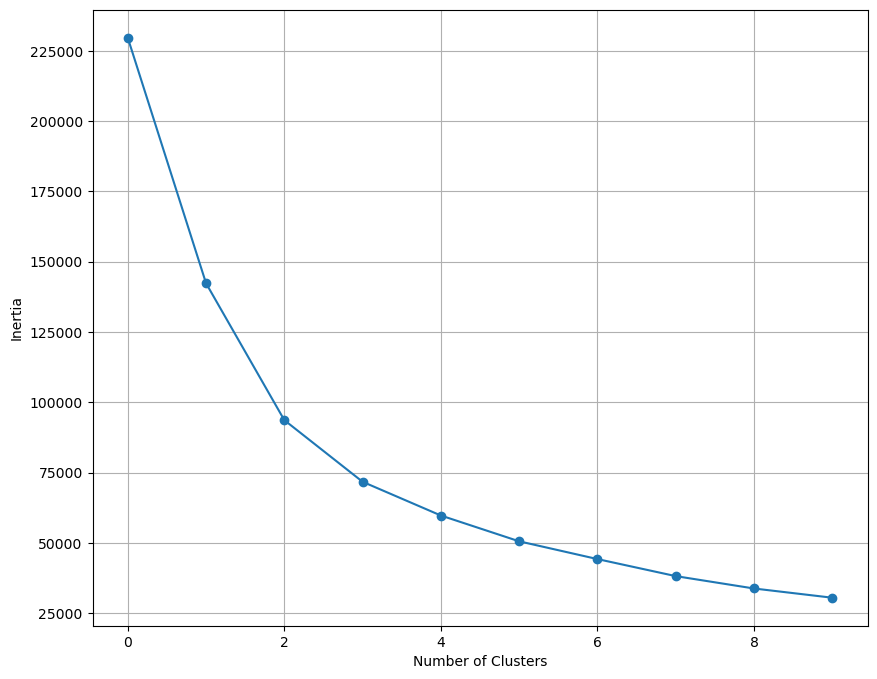

In [36]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pdf.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(inertia,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Based on the Elbow Graph above, the optimal number of clusters would be 2/3/4 clusters**

# Evaluate Model

Silhouette average score for k=2:  0.5871119218731367
Silhouette average score for k=3:  0.4310058874288927
Silhouette average score for k=4:  0.4470769192941003
Silhouette average score for k=5:  0.4569115710345004
Silhouette average score for k=6:  0.44424608117695324


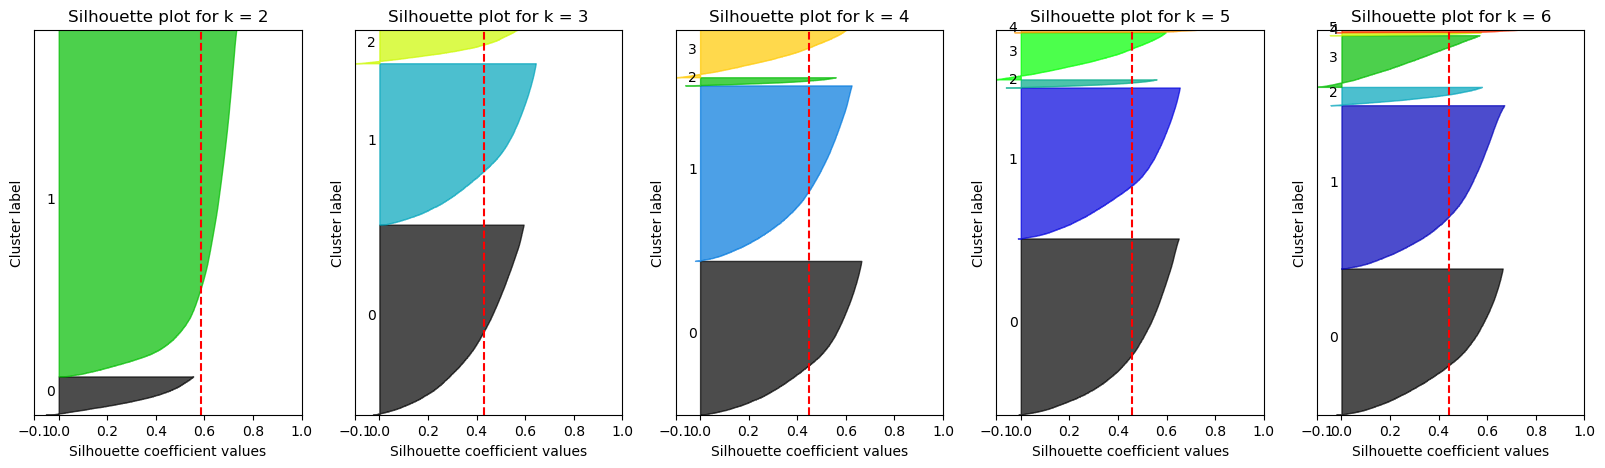

In [37]:
from sklearn.metrics import silhouette_score, silhouette_samples

# define range of k values
k_values = range(2, 7)

# create subplots
fig, axs = plt.subplots(1, len(k_values), figsize=(20, 5))

# iterate over each k value
for i, k in enumerate(k_values):
    # fit k-means model
    kmeans_eval = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    #labels = kmeans_eval.labels_
    labels = kmeans_eval.fit_predict(pdf)

    # calculate silhouette score
    silhouette_avg = silhouette_score(pdf, labels)

    # calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pdf, labels)

    print(f"Silhouette average score for k={k}: ", silhouette_avg)
    
    # plot silhouette plot
    y_lower = 10
    axs[i].set_xlim([-0.1, 1])
    axs[i].set_ylim([0, len(pdf) + (k + 1) * 10])
    axs[i].set_title('Silhouette plot for k = {}'.format(k))
    axs[i].set_xlabel('Silhouette coefficient values')
    axs[i].set_ylabel('Cluster label')

    for j in range(k):
        # aggregate silhouette scores for samples in cluster j
        ith_cluster_silhouette_values = sample_silhouette_values[labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0,
                              ith_cluster_silhouette_values,
                              facecolor=color,
                              edgecolor=color,
                              alpha=0.7)

        # label silhouette plots with their cluster numbers at the middle
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # compute new y_lower for next plot
        y_lower = y_upper + 10

    axs[i].axvline(x=silhouette_avg, color='red', linestyle='--')
    axs[i].set_yticks([])
    axs[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


**Based on the width of every cluster and the average silhouette score, it can be seen that dividing the data into every option (k = 2-6) is a good option. However, based on the silhouette score that calculates the performance of the model, dividing data into **3 clusters** is the most optimal option**

# Fitting Model - KMeans

In [38]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(pdf)

In [39]:
pdf['labels'] = kmeans.labels_

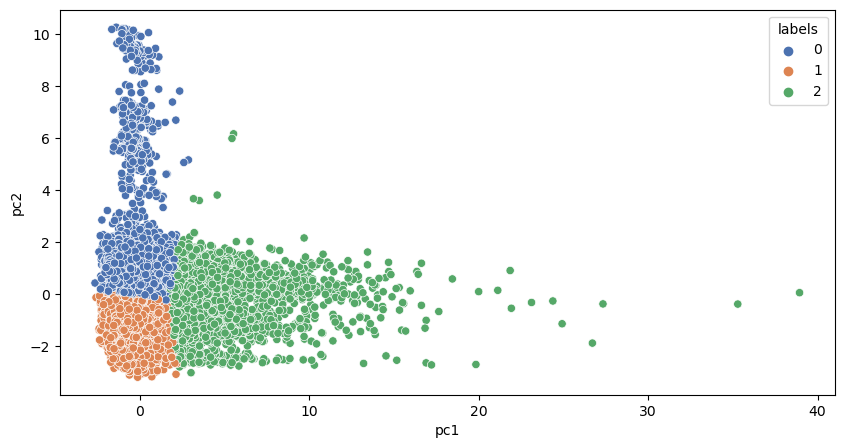

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pdf, x='pc1', y='pc2', hue='labels', palette='deep')
# sns.pairplot(data=pdf, hue='labels', palette='deep')
plt.show()

In [41]:
pdf['labels'].value_counts()

0    28518
1    24211
2     5019
Name: labels, dtype: int64

# Business Insight

### Returning the Preprocessed dataframe to original

In [42]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57748 entries, 0 to 62987
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         57748 non-null  float64
 1   AGE              57748 non-null  float64
 2   LAST_TO_END      57748 non-null  float64
 3   AVG_INTERVAL     57748 non-null  float64
 4   EXCHANGE_COUNT   57748 non-null  float64
 5   avg_discount     57748 non-null  float64
 6   Points_Sum       57748 non-null  float64
 7   Point_NotFlight  57748 non-null  float64
 8   GENDER           57748 non-null  int8   
 9   WORK_CITY        57748 non-null  int16  
 10  WORK_PROVINCE    57748 non-null  int16  
 11  WORK_COUNTRY     57748 non-null  int8   
dtypes: float64(8), int16(2), int8(2)
memory usage: 4.3 MB


In [43]:
pdf.drop(columns=['labels'], inplace=True)
for col in cats:
    codes = df_encode[col].unique()
    labels = df[col].unique()
    mapping = dict(zip(codes, labels))
    df_encode[col] = df_encode[col].replace(mapping)

predict = kmeans.predict(pdf)
df_encode['labels_cluster'] = pd.Series(predict, index=df_encode.index)

In [44]:
df_encode

FFP_TIER   AGE  LAST_TO_END  AVG_INTERVAL  EXCHANGE_COUNT  \
0           6.0  31.0          1.0      3.483254            34.0   
1           6.0  42.0          7.0      5.194245            29.0   
2           6.0  40.0         11.0      5.298507            20.0   
4           6.0  48.0          5.0      4.788079            27.0   
5           6.0  64.0         79.0      7.043956            10.0   
...         ...   ...          ...           ...             ...   
62983       4.0  25.0        297.0      4.000000             1.0   
62984       4.0  38.0         89.0     37.000000            14.0   
62985       4.0  43.0         29.0    166.000000             0.0   
62986       4.0  36.0        400.0     12.000000             0.0   
62987       4.0  29.0        403.0      6.000000             0.0   

       avg_discount  Points_Sum  Point_NotFlight  GENDER     WORK_CITY  \
0          0.961639    619760.0             50.0    Male       missing   
1          1.252314    415768.0             33.0    Male       missing   
2          1.254676    406361.0             26.0    Male       missing   
4          0.970658    338813.0             39.0    Male   Los Angeles   
5          0.967692    343121.0             15.0    Male       guiyang   
...             ...         ...              ...     ...           ...   
62983      0.000000     12318.0             22.0  Female       guiyang   
62984      0.000000    106972.0             43.0    Male   shanghaishi   
62985      0.000000         0.0              0.0  Female       guiyang   
62986      0.000000         0.0              0.0  Female       guiyang   
62987      0.000000         0.0              0.0  Female  guangzhoushi   

      WORK_PROVINCE WORK_COUNTRY  labels_cluster  
0           beijing           CN               2  
1           beijing           CN               2  
2           beijing           CN               2  
4                CA           CN               2  
5           guizhou           CN               2  
...             ...          ...             ...  
62983       guizhou           CN               0  
62984       guizhou           CN               2  
62985       guizhou           CN               0  
62986       guizhou           CN               0  
62987      zhejiang           CN               1  

[57748 rows x 13 columns]

In [45]:
num_dtypes = ['int32','int64','float64']
cat_dtypes = ['object']

num_df = df_encode.select_dtypes(include=num_dtypes)
cat_df = df_encode.select_dtypes(include=cat_dtypes)

numericals = num_df.columns
categoricals = cat_df.columns

In [46]:
num_info = df_encode[numericals].groupby('labels_cluster').agg(['mean', 'median', 'std', 'min', 'max'])
num_info

FFP_TIER                                   AGE         \
                    mean median       std  min  max       mean median   
labels_cluster                                                          
0               4.022267    4.0  0.154290  4.0  6.0  41.017182   40.0   
1               4.022428    4.0  0.156482  4.0  6.0  42.506898   41.0   
2               4.999004    5.0  0.748453  4.0  6.0  44.436143   44.0   

                                      LAST_TO_END                          \
                     std   min    max        mean median         std  min   
labels_cluster                                                              
0               9.612466   7.0   92.0  181.846518  117.0  181.692055  1.0   
1               9.487180   6.0  110.0  185.162736  118.0  184.968116  1.0   
2               8.957027  14.0   81.0   38.535565   15.0   65.412022  1.0   

                      AVG_INTERVAL                                    \
                  max         mean     median        std  min    max   
labels_cluster                                                         
0               730.0    71.795458  47.861905  80.760231  0.0  728.0   
1               731.0    72.441546  49.357143  78.661878  0.0  718.0   
2               699.0    24.209433  17.540541  25.277819  0.0  555.0   

               EXCHANGE_COUNT                             avg_discount  \
                         mean median       std  min   max         mean   
labels_cluster                                                           
0                    0.148888    0.0  0.504002  0.0   6.0     0.710375   
1                    0.126513    0.0  0.450961  0.0   4.0     0.698818   
2                    2.372186    2.0  2.853775  0.0  37.0     0.864886   

                                                Points_Sum           \
                  median       std  min  max          mean   median   
labels_cluster                                                        
0               0.705803  0.177073  0.0  1.5   8898.776387   5961.0   
1               0.697491  0.167176  0.0  1.5   8035.656974   5193.0   
2               0.790434  0.234967  0.0  1.5  54553.276549  44478.0   

                                              Point_NotFlight         \
                         std    min       max            mean median   
labels_cluster                                                         
0                8671.374305    0.0   94535.0        2.602707    0.0   
1                8163.447404    0.0   75928.0        1.261204    0.0   
2               44128.243055  854.0  985572.0       12.746962    6.0   

                                       
                      std  min    max  
labels_cluster                         
0                6.497786  0.0   48.0  
1                4.146193  0.0   42.0  
2               15.355289  0.0  140.0

In [47]:
cat_info = df_encode[categoricals].join(df_encode['labels_cluster']).groupby('labels_cluster').agg(pd.Series.mode)
cat_info

GENDER     WORK_CITY WORK_PROVINCE WORK_COUNTRY
labels_cluster                                                
0                Male       guiyang       guizhou           CN
1                Male  guangzhoushi        FRANCE           CN
2                Male       guiyang       guizhou           CN

In [48]:
df_encode['labels_cluster'].value_counts()

0    28518
1    24211
2     5019
Name: labels_cluster, dtype: int64

### Labels Definition

Based on the previous clustering analysis, here are the segmentation for every cluster created:
1. Label 0: Male (41++ yo) who are from **Guiyang** and departed from **Guizhou Province and China** with an average flight time of **71 hours** and holds a Tier 4 membership

2. Label 1: Male (42++ yo) who are from **Guangzhoushi** and departed from **France and China** with an average flight time of **72 hours** and holds a Tier 4 membership

3. Label 2: Male (44++ yo) who are from **Guiyang** and departed from **Guizhou Province and China** with an average flight time of **24 hours** and holds a Tier 5 membership

### Business Recommendation

Since people from **Guiyang, China** are the highest segment of all, the company might be able to apply some bundling promo trips **from/to Beijing, China** to drive more customers.<br>
Morover, company can target customers with **Tier 4** in their membership to apply some additional discounts or other promos.